# EXPERIMENT - STATE-GROUP-4

# State Groups:

- `group_1`: Patients with low toxicity and low tumor size  - W_0 ~ N(0.5, 0.16**2), T_0 ~ N(0.5, 0.16**2)
- `group_2`: Patients with high toxicity and low tumor size - W_0 ~ N(1.5, 0.16**2), T_0 ~ N(0.5, 0.16**2)
- `group_3`: Patients with low initial toxicity and high tumor size - W_0 ~ N(0.5, 0.16**2), T_0 ~ N(1.5, 0.16**2)
- `group_4`: Patients with high toxicity and high tumor size - W_0 ~ N(1.5, 0.16**2), T_0 ~ N(1.5, 0.16**2)
-  `None`  : Patients with toxicity and tumor size sample from - W_0 ~ U(0,2), T_0 ~  U(0,2)

In [1]:
%load_ext autoreload
%autoreload 2

import tqdm
import _set_path
from pbpi.algo_core.training import evaluations_per_config

In [2]:
ALGO_TYPE = {'original': {'name': 'original', 'exploration': False}
            ,'modified': {'name': 'modified', 'exploration': True} }

---
## Original experiment setup

### Original algorithm

In [3]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_4'
          , 'init_state_tag': 'g4'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

In [4]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = False # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 3
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 3


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1
Runs:   0%|          | 0/1 [12:12<?, ?it/s]


ValueError: setting an array element with a sequence.

### Modified algorithm

In [11]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 2
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_4'
          , 'init_state_tag': 'g4'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

In [12]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']  
                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = False # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 3
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()





Evaluations:   0%|          | 0/1 [00:00<?, ?it/s]




Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 3


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1
Runs:   0%|          | 0/1 [06:59<?, ?it/s]


ValueError: setting an array element with a sequence.

---
## Using `tumor size + toxicity` to generate preferences

### Original algorithm

In [17]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 3
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_4'
          , 'init_state_tag': 'g4'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']








Evaluations:   0%|          | 0/1 [00:00<?, ?it/s]







Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 3


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


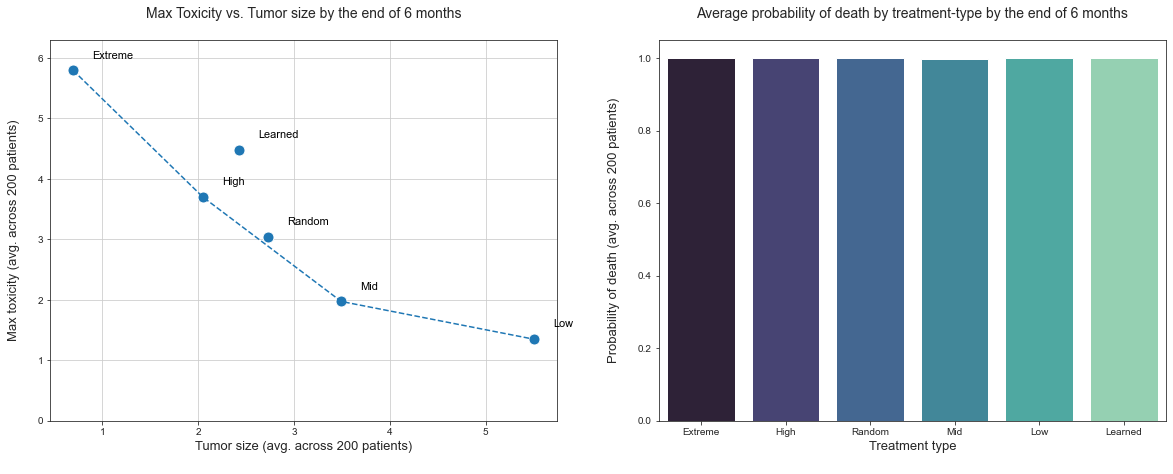

Evaluations:   0%|          | 0/1 [4:17:22<?, ?it/s]


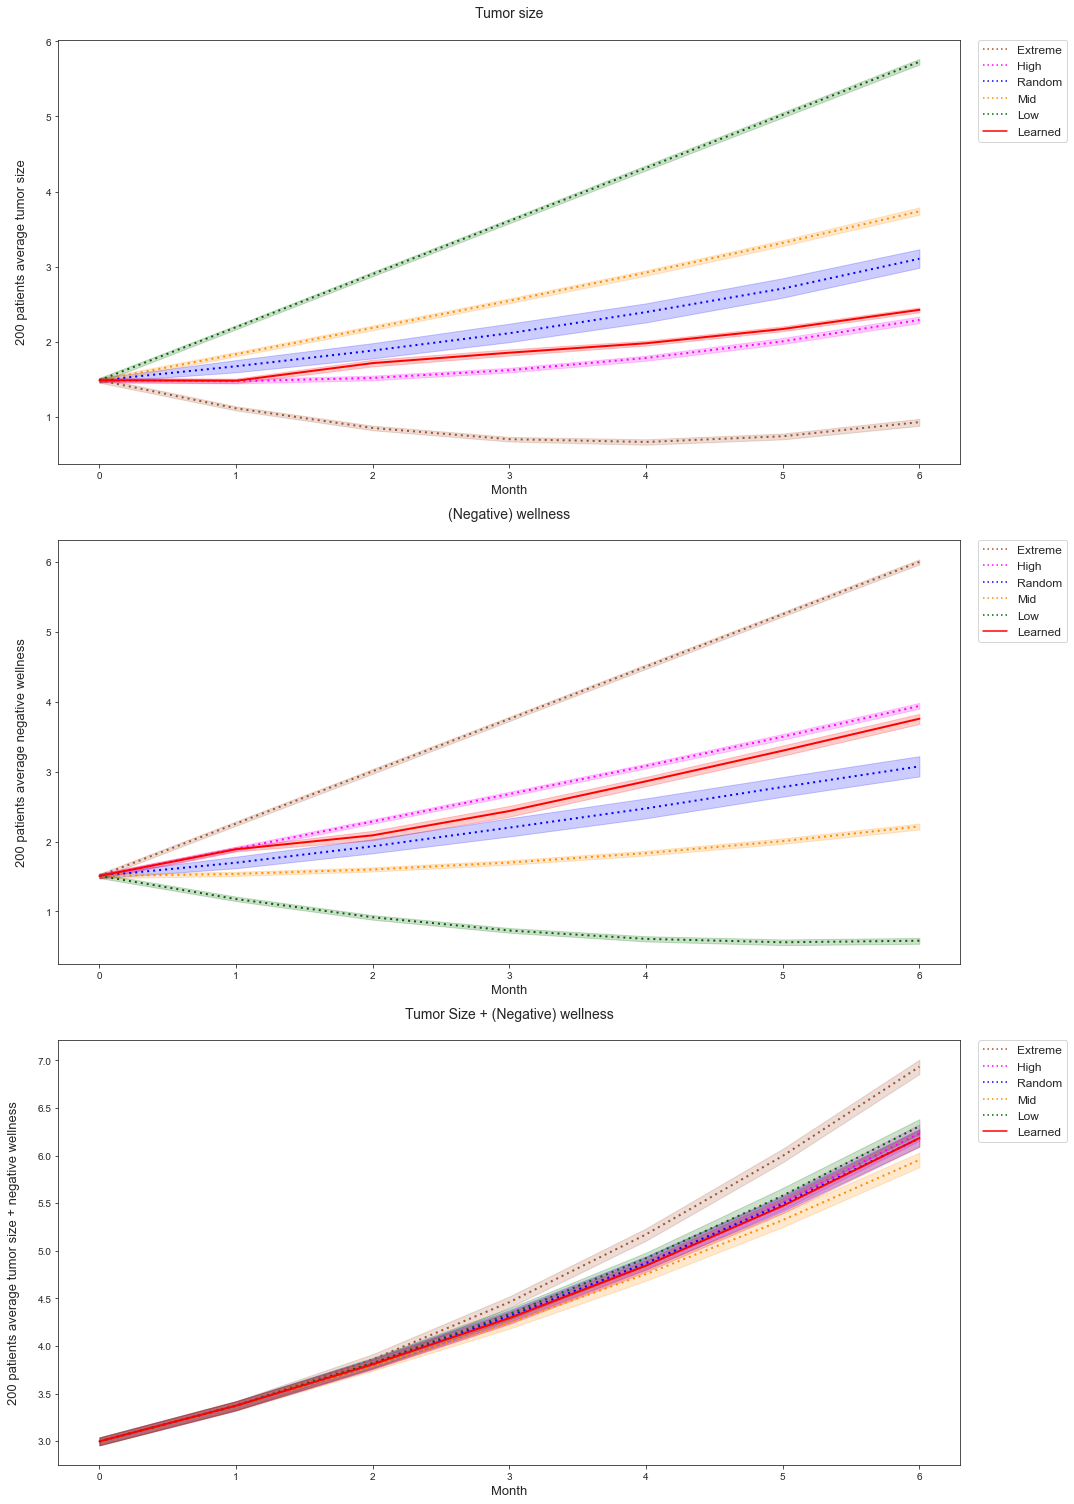


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 2.4256590716250233
                         - Avg. max. toxicity : 4.482248060596818
                         - Avg. tumor size + toxicity (at the end of 6 months): 4.468129987929046
                         - Avg. prob. of death : 0.9996270287184003

Runs:   0%|          | 0/1 [15:36<?, ?it/s]


ValueError: setting an array element with a sequence.

In [18]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = True # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 3
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

### Modified algorithm

In [21]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 4
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_4'
          , 'init_state_tag': 'g4'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

In [22]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = True # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 3
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()


Evaluations:   0%|          | 0/1 [00:00<?, ?it/s]

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 3


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1
Runs:   0%|          | 0/1 [05:01<?, ?it/s]


ValueError: setting an array element with a sequence.

---
## TO-DO: Lengthier treatment regime - 6 months training data -> 12 months evaluation